<a href="https://colab.research.google.com/github/hydracsnova13/IIITHAIML/blob/main/Copy_of_AIML_Module_1_Lab_1_Extracting_features_from_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 1
# Extracting features from data





In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [ ]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')#set langguage to english

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')#set langguage to french

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [ ]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase,homogenize
  text = re.sub('[^a-z]+', '', text) # only keep characters hich for the 26 letter alphabet
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesan

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

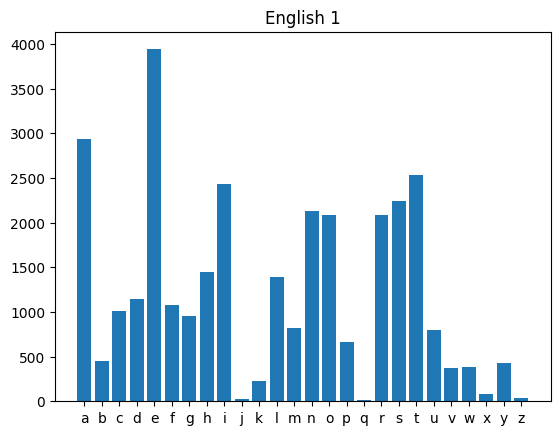

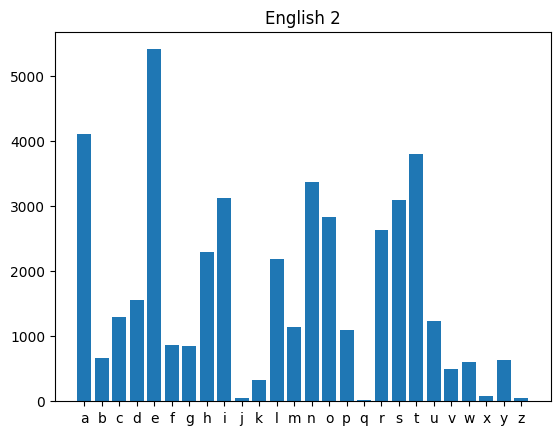

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

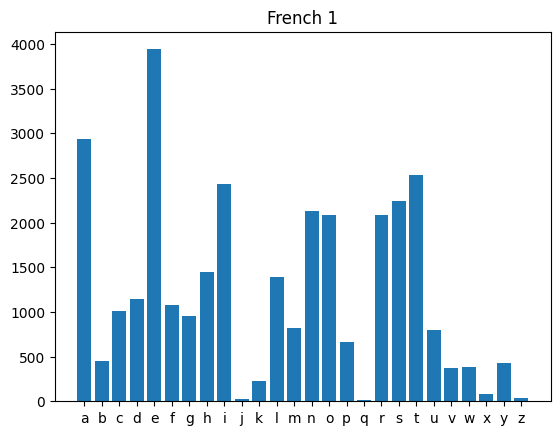

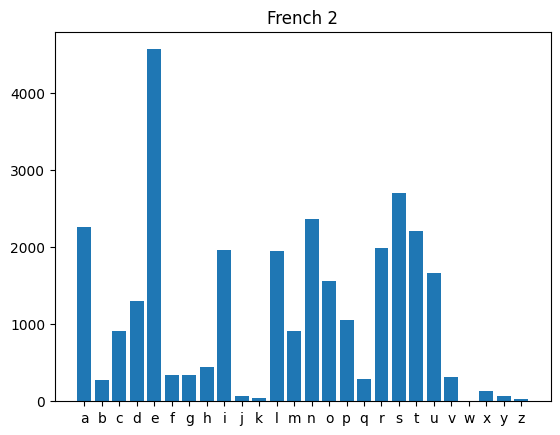

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

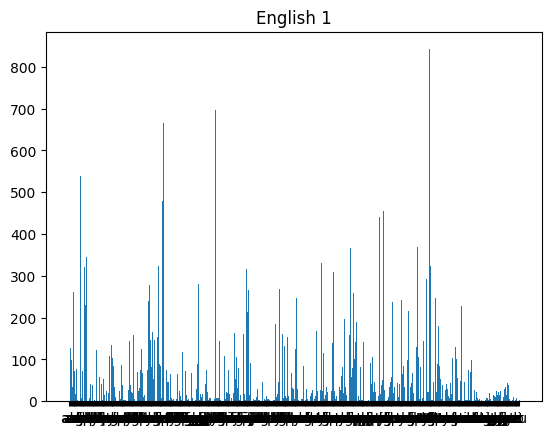

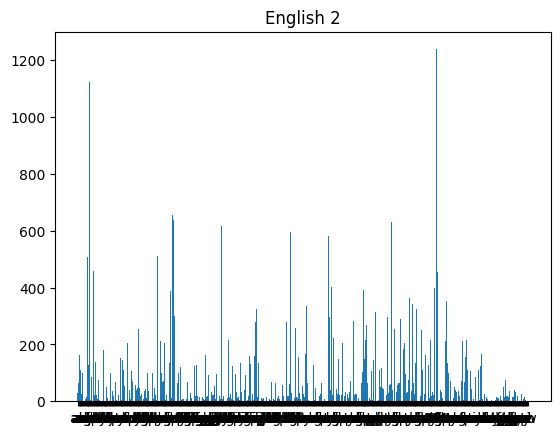

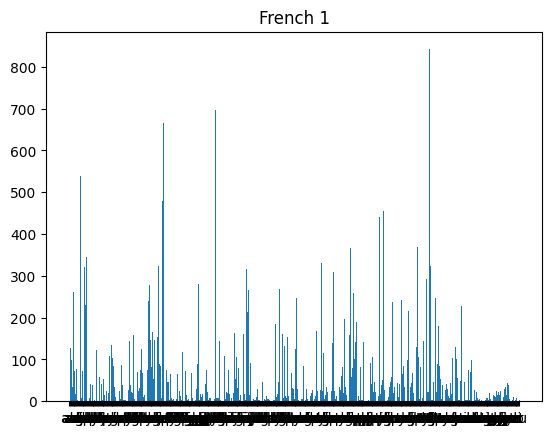

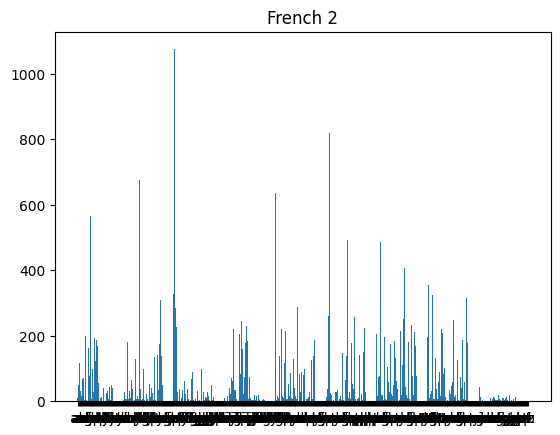

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

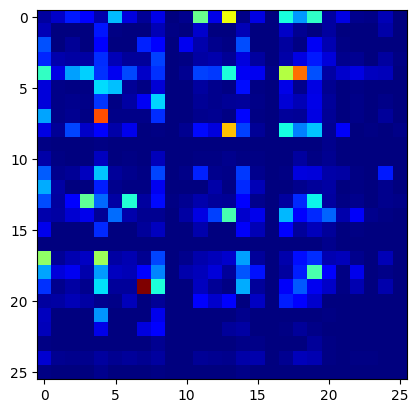

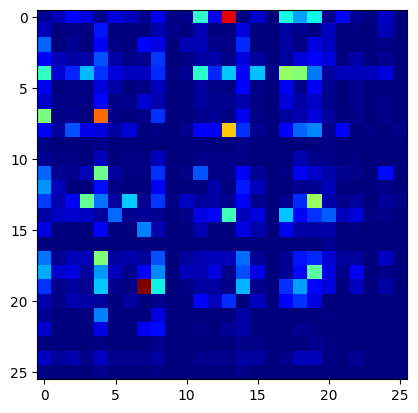

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

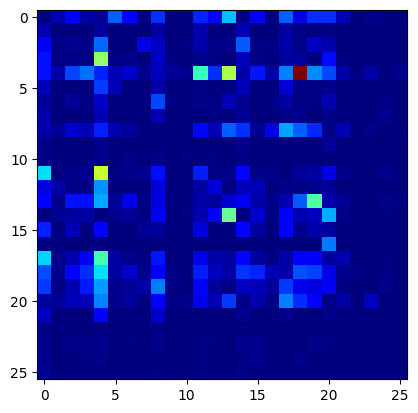

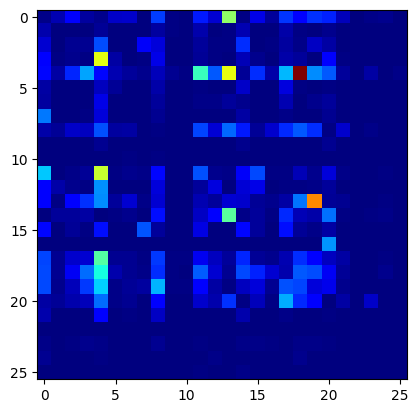

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 842.0
('h', 'e') : 697.0
('e', 's') : 665.0
('i', 'n') : 594.0
('a', 'n') : 538.0
('e', 'r') : 478.0
('r', 'e') : 454.0
('r', 'a') : 441.0
('a', 'l') : 404.0
('n', 'd') : 393.0

English 2:
('t', 'h') : 1238.0
('a', 'n') : 1123.0
('h', 'e') : 983.0
('i', 'n') : 863.0
('n', 't') : 664.0
('e', 'r') : 655.0
('e', 's') : 637.0
('r', 'e') : 629.0
('h', 'a') : 618.0
('l', 'e') : 597.0

French 1:
('e', 's') : 737.0
('l', 'e') : 438.0
('e', 'n') : 409.0
('d', 'e') : 390.0
('o', 'n') : 349.0
('n', 't') : 329.0
('r', 'e') : 317.0
('e', 'l') : 308.0
('l', 'a') : 254.0
('s', 'e') : 254.0

French 2:
('e', 's') : 1075.0
('n', 't') : 820.0
('e', 'n') : 678.0
('d', 'e') : 675.0
('l', 'e') : 635.0
('a', 'n') : 566.0
('o', 'n') : 492.0
('r', 'e') : 486.0
('e', 'l') : 451.0
('s', 'e') : 407.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

***I HAVE TAKEN THE TOPICS HUMANS AND ANIMALS***

In [ ]:
topic3 = 'Humans'
topic4 = 'Animals'

wikipedia.set_lang('en')#set langguage to english

eng3 = wikipedia.page(topic3).content
eng4 = wikipedia.page(topic4).content

wikipedia.set_lang('fr')#set langguage to french

fr3 = wikipedia.page(topic3).content
fr4 = wikipedia.page(topic4).content

In [ ]:
eng3

'Humans, or modern humans (Homo sapiens), are the most common and widespread species of primate. A great ape characterized by their hairlessness, bipedalism, and high intelligence, humans have a large brain and resulting cognitive skills that enable them to thrive in varied environments and develop complex societies and civilizations. Humans are highly social and tend to live in complex social structures composed of many cooperating and competing groups, from families and kinship networks to political states. As such, social interactions between humans have established a wide variety of values, social norms, languages, and rituals, each of which bolsters human society. The desire to understand and influence phenomena has motivated humanity\'s development of science, technology, philosophy, mythology, religion, and other conceptual frameworks.\nAlthough some scientists equate the term "humans" with all members of the genus Homo, in common usage it generally refers to Homo sapiens, the o

In [ ]:
eng4

'Animals are multicellular, eukaryotic organisms in the biological kingdom Animalia. With few exceptions, animals consume organic material, breathe oxygen, have myocytes and are able to move, can reproduce sexually, and grow from a hollow sphere of cells, the blastula, during embryonic development. As of 2022, 2.16 million living animal species have been described—of which around 1.05 million are insects, over 85,000 are molluscs, and around 65,000 are vertebrates. It has been estimated there are around 7.77 million animal species. Animals range in length from 8.5 micrometres (0.00033 in) to 33.6 metres (110 ft). They have complex interactions with each other and their environments, forming intricate food webs. The scientific study of animals is known as zoology.\nMost living animal species are in Bilateria, a clade whose members have a bilaterally symmetric body plan. The Bilateria include the protostomes, containing animals such as nematodes, arthropods, flatworms, annelids and mollu

In [ ]:
fr3

"Humans (graphie HUM∀NS) est une série télévisée américano-britannique de science-fiction créée par le duo de Sam Vincent et Jonathan Brackley, basée sur la série suédoise Äkta människor (Real Humans : 100 % humain), et diffusée entre le 14 juin 2015 et le 5 juillet 2018 sur Channel 4, et aux États-Unis entre le 28 juin 2015 et le 17 juillet 2018 sur AMC.\nEn France, la série est diffusée depuis le 27 août 2016 sur HD1, et au Québec, elle est diffusée depuis mai 2017 sur la plateforme web ICI TOU.TV. Néanmoins, elle reste inédite dans les autres pays francophones.\n\n\n== Synopsis ==\nLa série se déroule dans un présent alternatif où la technologie a permis de créer les Synthètiques (souvent abrégé par Synthèt), des robots domestiques qui obéissent aux humains. Certains d'entre eux semblent mystérieusement doués d'une conscience et d'un libre arbitre.\n\n\n== Distribution ==\n\n\n=== Acteurs principaux ===\n\n\n==== Les humains ====\nColin Morgan (VF : Jean-Christophe Dollé) : Leo Elst

In [ ]:
fr4

"The Animals [ði ˈænɪməlz] est un groupe britannique de rock des années 1960. Au même titre que les Rolling Stones, cette formation a été l'une des pionnières du British Blues Boom et a contribué à importer en Europe le rhythm and blues noir américain.\n\n\n== Historique ==\n\n\n=== The Animals (1962-1966) ===\nAu début des années 1960, Alan Price, John Steel, Chas Chandler et Hilton Valentine jouent chaque fin de semaine à Newcastle-upon-Tyne dans un petit orchestre de jazz baptisé Alan Price Combo du nom du chanteur, également membre le plus influent du groupe. Rapidement, ils sont rejoints par Eric Burdon, un autre chanteur. Passionné de blues et de rhythm and blues, Burdon fait évoluer le groupe dans une direction qui correspond plus à ses aspirations musicales. Ils reprennent les plus grands morceaux de bluesmen américains et s'affirment comme un groupe de scène remarqué. Leur sauvagerie sur scène, où se dégage notamment la voix âpre et puissante de Burdon leur vaut rapidement le 

In [ ]:
def cleanupX(text):
  text = text.lower()  # make it lowercase,homogenize
  text = re.sub('[^a-z,^0-9]+', '', text) # only keep characters each for the 26 letter alphabet and numbers from 0-9
  return text

In [ ]:
eng3 = cleanupX(eng3)
eng4 = cleanupX(eng4)
fr3 = cleanupX(fr3)
fr4 = cleanupX(fr4)

In [ ]:
print(eng3)
print(eng4)
print(fr3)
print(fr4)

humans,ormodernhumanshomosapiens,arethemostcommonandwidespreadspeciesofprimateagreatapecharacterizedbytheirhairlessness,bipedalism,andhighintelligence,humanshavealargebrainandresultingcognitiveskillsthatenablethemtothriveinvariedenvironmentsanddevelopcomplexsocietiesandcivilizationshumansarehighlysocialandtendtoliveincomplexsocialstructurescomposedofmanycooperatingandcompetinggroups,fromfamiliesandkinshipnetworkstopoliticalstatesassuch,socialinteractionsbetweenhumanshaveestablishedawidevarietyofvalues,socialnorms,languages,andrituals,eachofwhichbolstershumansocietythedesiretounderstandandinfluencephenomenahasmotivatedhumanitysdevelopmentofscience,technology,philosophy,mythology,religion,andotherconceptualframeworksalthoughsomescientistsequatethetermhumanswithallmembersofthegenushomo,incommonusageitgenerallyreferstohomosapiens,theonlyextantmemberothermembersofthegenushomoareknownasarchaichumansanatomicallymodernhumansemergedaround300,000yearsagoinafrica,evolvingfromhomoheidelbergensisor

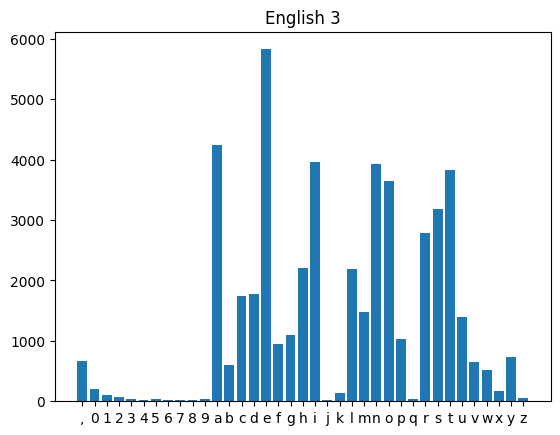

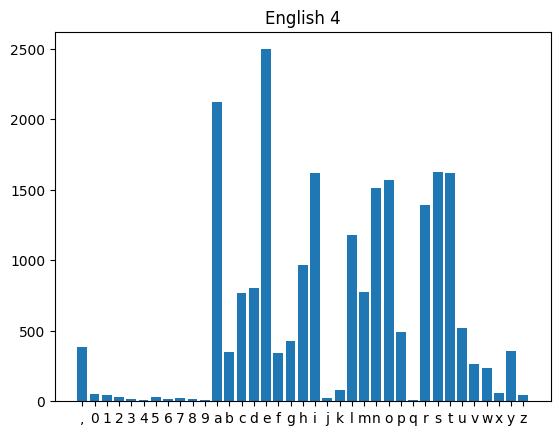

In [ ]:
unigram_eng3 = Counter(ngrams(eng3,1))
plothistogram(unigram_eng3)
plt.title('English 3')
plt.show()
unigram_eng4 = Counter(ngrams(eng4,1))
plothistogram(unigram_eng4)
plt.title('English 4')
plt.show()

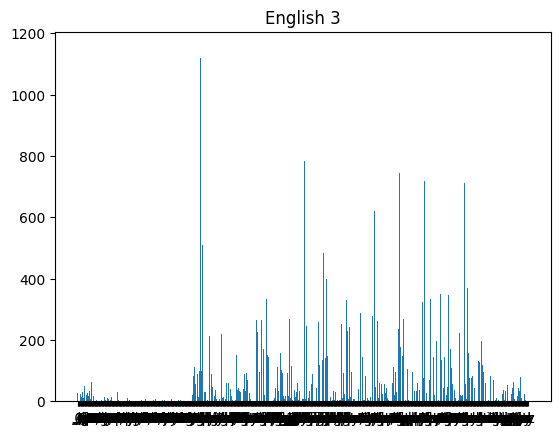

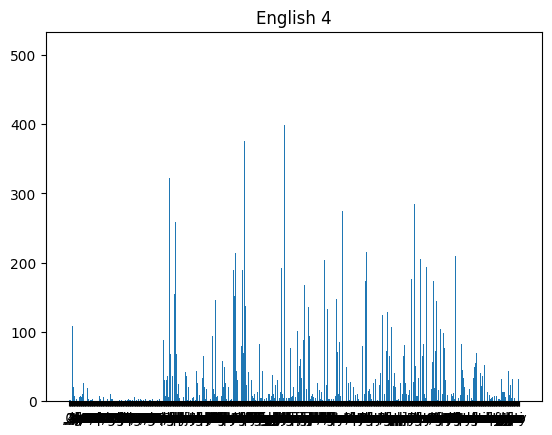

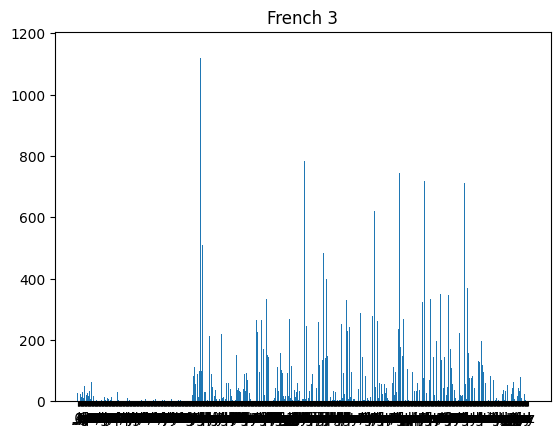

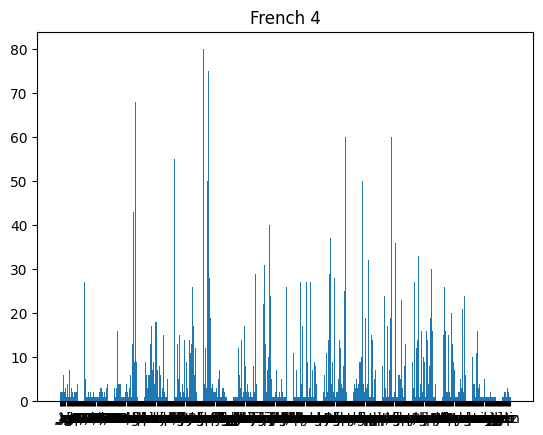

In [ ]:
bigram_eng3 = Counter(ngrams(eng3,2)) # bigrams
plothistogram(bigram_eng3)
plt.title('English 3')
plt.show()

bigram_eng4 = Counter(ngrams(eng4,2))
plothistogram(bigram_eng4)
plt.title('English 4')
plt.show()

bigram_fr3 = Counter(ngrams(fr3,2))
plothistogram(bigram_eng3)
plt.title('French 3')
plt.show()

bigram_fr4 = Counter(ngrams(fr4,2))
plothistogram(bigram_fr4)
plt.title('French 4')
plt.show()

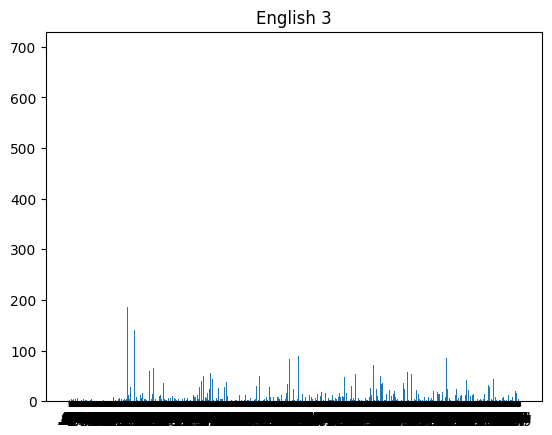

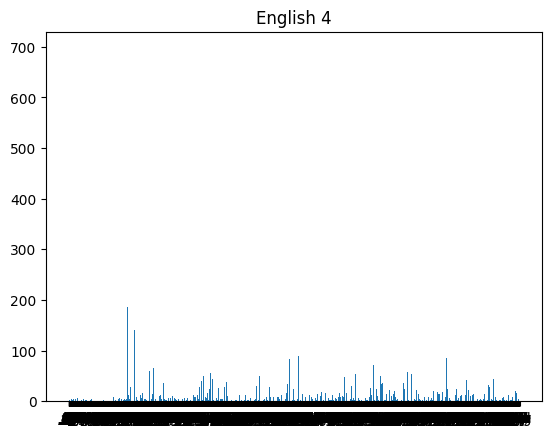

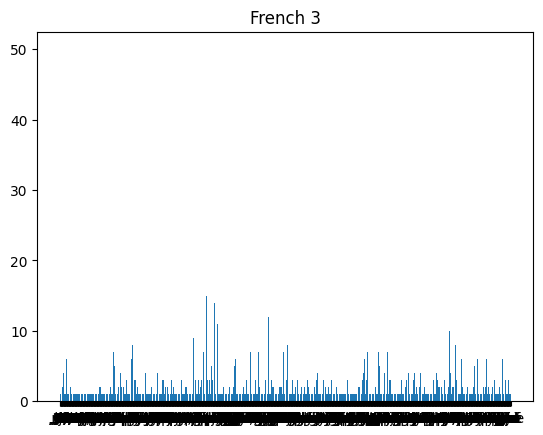

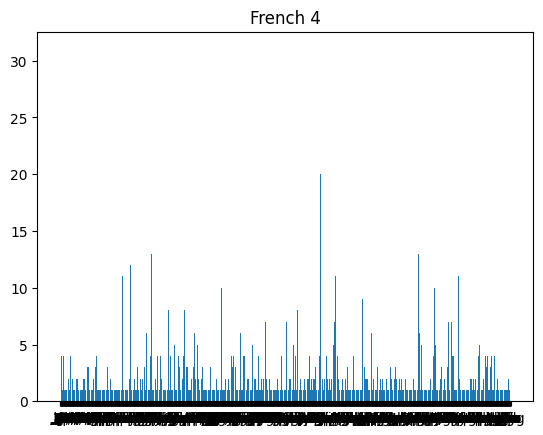

In [ ]:
trigram_eng3 = Counter(ngrams(eng3,3)) # trigrams
plothistogram(trigram_eng3)
plt.title('English 3')
plt.show()

trigram_eng4 = Counter(ngrams(eng3,3)) # trigrams
plothistogram(trigram_eng4)
plt.title('English 4')
plt.show()

trigram_fr3 = Counter(ngrams(fr3,3)) # trigrams
plothistogram(trigram_fr3)
plt.title('French 3')
plt.show()

trigram_fr4 = Counter(ngrams(fr4,3)) # trigrams
plothistogram(trigram_fr4)
plt.title('French 4')
plt.show()

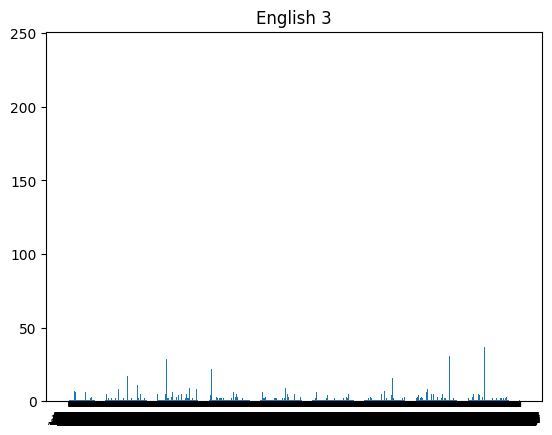

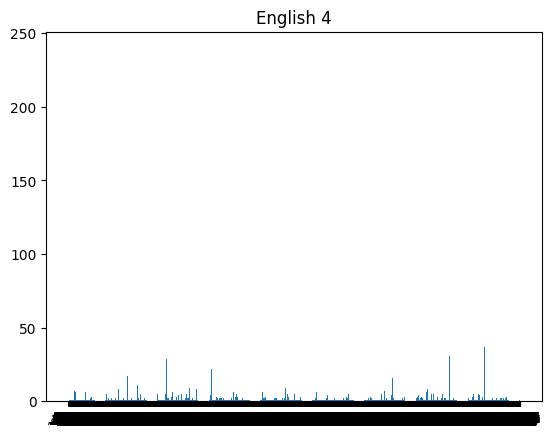

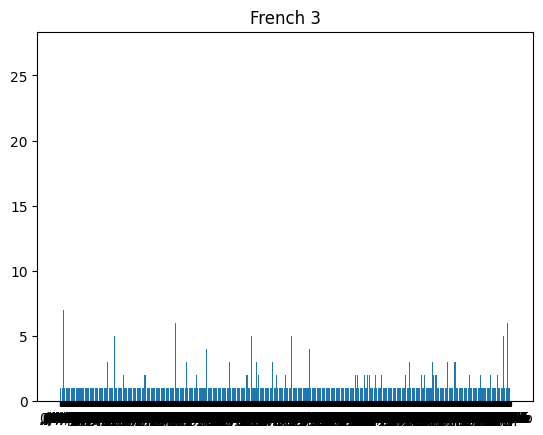

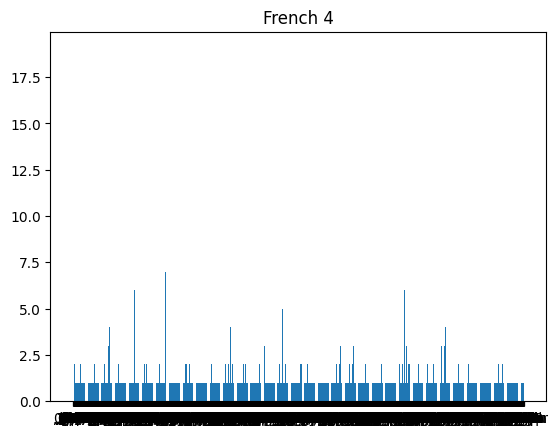

In [ ]:
pentagram_eng3 = Counter(ngrams(eng3,5)) # pentagrams
plothistogram(pentagram_eng3)
plt.title('English 3')
plt.show()

pentagram_eng4 = Counter(ngrams(eng3,5)) # pentagrams
plothistogram(pentagram_eng4)
plt.title('English 4')
plt.show()

pentagram_fr3 = Counter(ngrams(fr3,5)) # pentagrams
plothistogram(pentagram_fr3)
plt.title('French 3')
plt.show()

pentagram_fr4 = Counter(ngrams(fr4,5)) # pentagrams
plothistogram(pentagram_fr4)
plt.title('French 4')
plt.show()

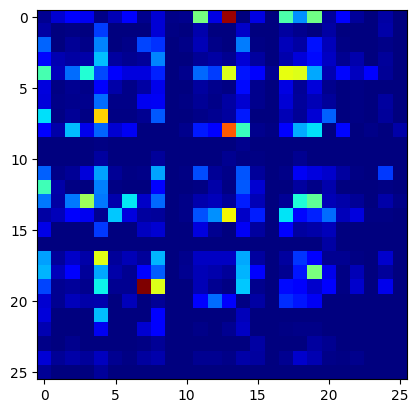

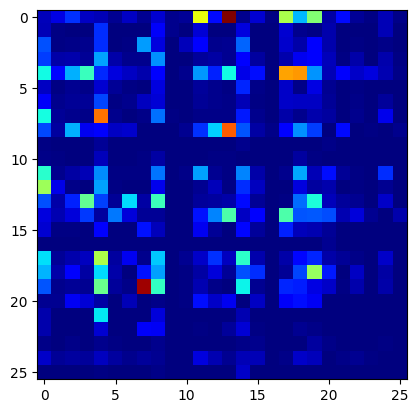

In [ ]:
bieng3 = plotbihistogram(bigram_eng3)
plt.show()
bieng4 = plotbihistogram(bigram_eng4)

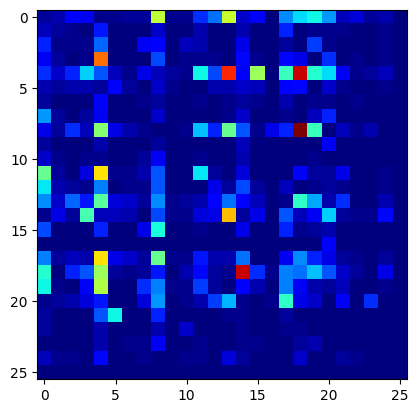

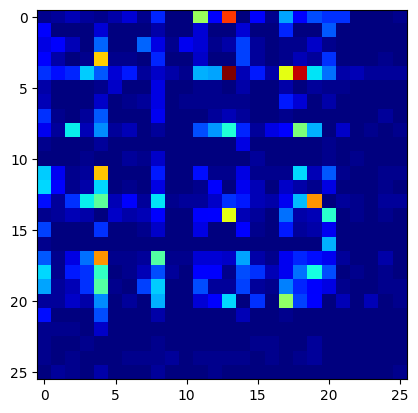

In [ ]:
bifr3 = plotbihistogram(bigram_fr3)
plt.show()
bifr4 = plotbihistogram(bigram_fr4)

In [ ]:
print('\nEnglish 3:')
ShowTopN(bieng3)
print('\nEnglish 4:')
ShowTopN(bieng4)
print('\nFrench 3:')
ShowTopN(bifr3)
print('\nFrench 4:')
ShowTopN(bifr4)


English 3:
('t', 'h') : 1148.0
('a', 'n') : 1120.0
('i', 'n') : 937.0
('h', 'e') : 785.0
('o', 'n') : 743.0
('e', 'r') : 723.0
('r', 'e') : 717.0
('t', 'i') : 713.0
('e', 's') : 711.0
('e', 'n') : 707.0

English 4:
('a', 'n') : 508.0
('t', 'h') : 493.0
('i', 'n') : 412.0
('h', 'e') : 399.0
('e', 's') : 380.0
('e', 'r') : 375.0
('a', 'l') : 322.0
('r', 'e') : 285.0
('a', 'r') : 283.0
('m', 'a') : 274.0

French 3:
('i', 's') : 76.0
('e', 's') : 71.0
('s', 'o') : 71.0
('e', 'n') : 66.0
('d', 'e') : 60.0
('o', 'n') : 54.0
('l', 'e') : 51.0
('r', 'e') : 51.0
('a', 'n') : 45.0
('a', 'i') : 44.0

French 4:
('e', 'n') : 80.0
('e', 's') : 75.0
('a', 'n') : 68.0
('r', 'e') : 60.0
('n', 't') : 60.0
('l', 'e') : 56.0
('d', 'e') : 55.0
('e', 'r') : 50.0
('o', 'n') : 50.0
('a', 'l') : 43.0


# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

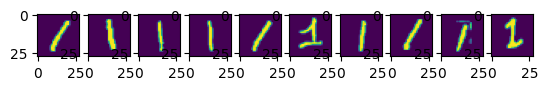

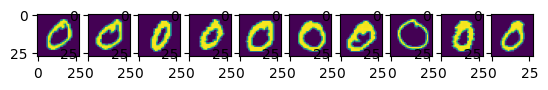

In [ ]:
for ii in range(10):
  plt.subplot(1, 10, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(10):
  plt.subplot(1, 10, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

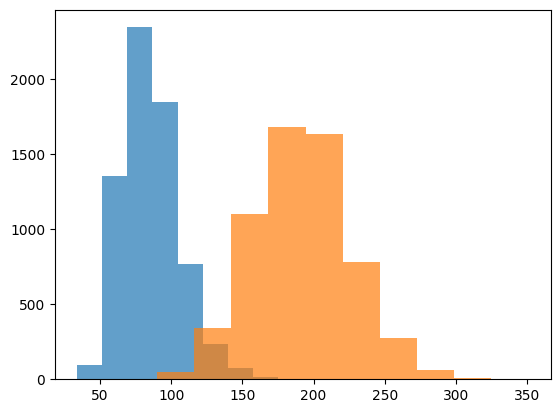

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

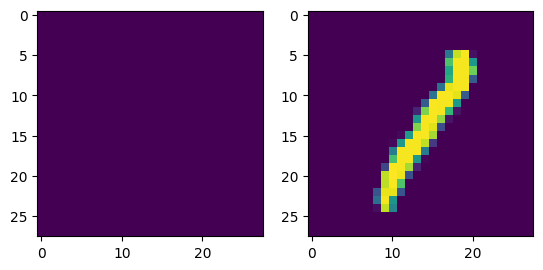

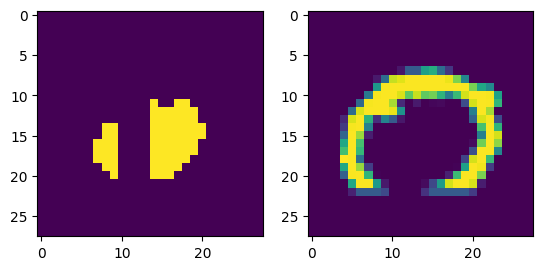

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

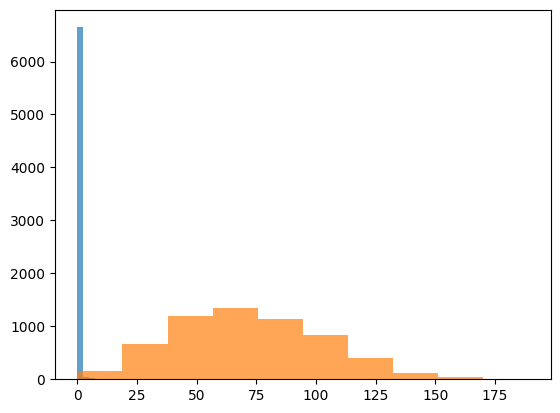

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

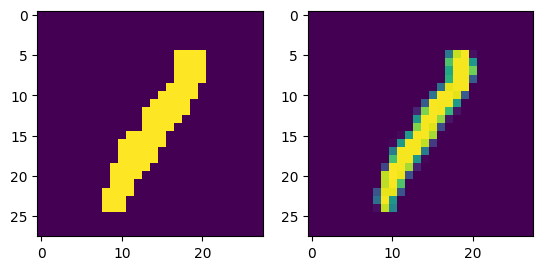

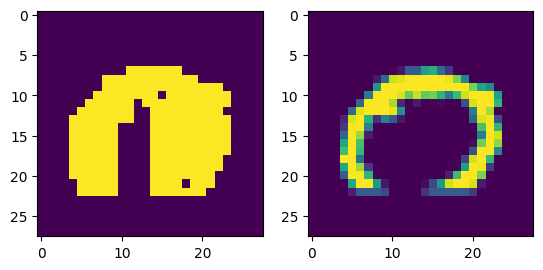

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

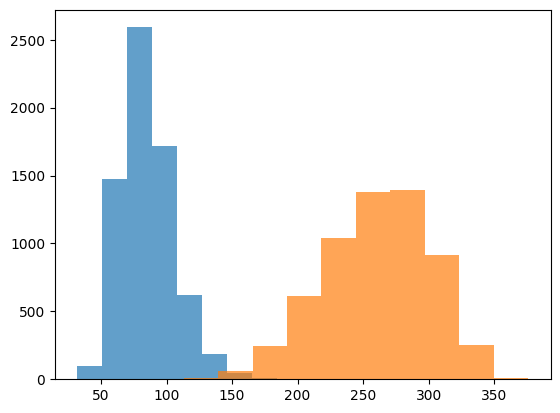

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

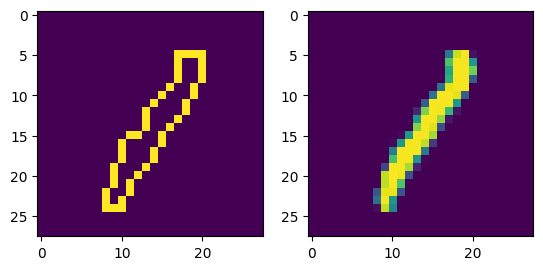

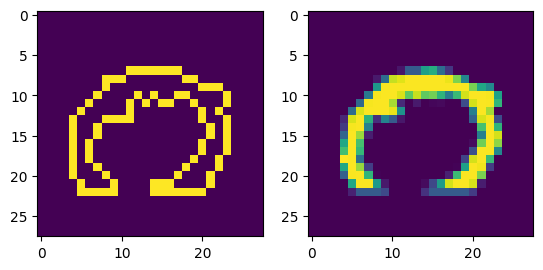

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

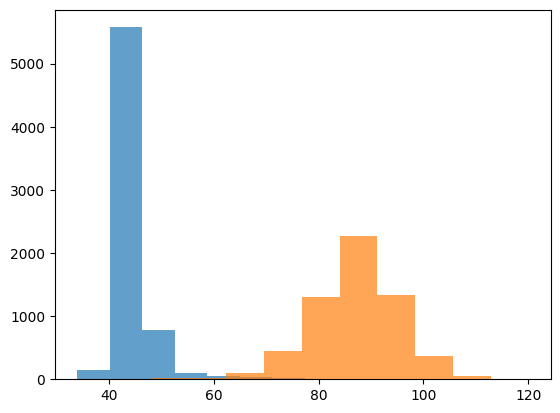

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

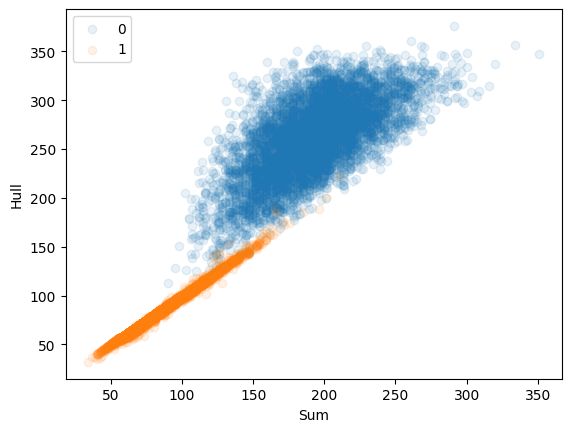

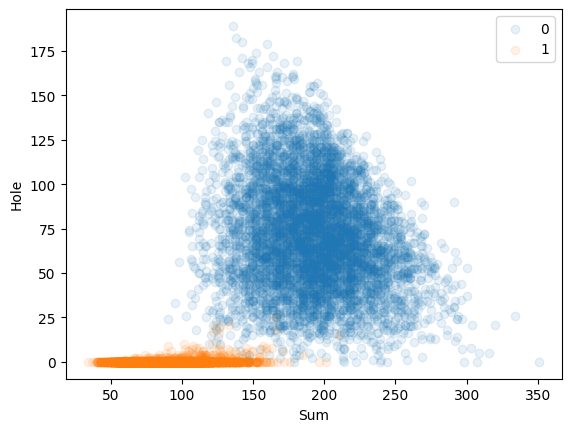

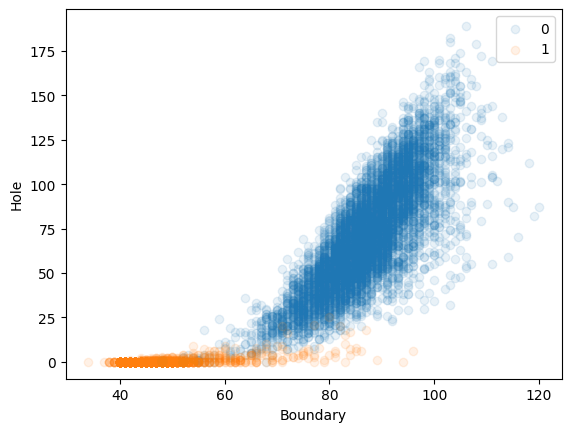

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

1. Which is the best combination of features?

The choice of the best combination of features can depend on the specific classification problem and dataset. Typically, it's essential to experiment with various combinations and use techniques like feature selection or dimensionality reduction (e.g., Principal Component Analysis) to identify the most informative features. You can evaluate the performance of different feature combinations using machine learning algorithms and cross-validation.

For example, you can create a feature vector by concatenating or stacking the extracted features like 'Hole,' 'Sum,' and 'Boundary.' Then, you can use techniques like a decision tree, random forest, or a neural network to classify the digits (0 and 1 in this case) based on these features. The feature combination that results in the highest classification accuracy on a validation set can be considered the best.

2. How would you test or visualize four or more features?

When dealing with four or more features, it becomes challenging to visualize them directly in a single 2D or 3D plot. However, you can use various techniques to explore and understand your data:

Pairwise Scatter Plots: Create scatter plots for pairs of features to visualize relationships between them. This can help identify correlations or patterns.

Heatmaps: Generate a heatmap of feature correlations. Bright spots on the heatmap indicate strong correlations between features.

Dimensionality Reduction: Apply dimensionality reduction techniques like PCA or t-SNE to project high-dimensional data into a lower-dimensional space (e.g., 2D or 3D) for visualization.

Feature Importance: Use machine learning models to determine feature importance. Some algorithms provide feature importance scores that indicate which features contribute most to the classification.

Statistical Tests: Conduct statistical tests to assess the significance of individual features in distinguishing between classes.

Clustering: Apply clustering algorithms to group data points based on the feature space. Visualize clusters to see if they align with class labels.

3. Can you come up with your own features?

Yes, you can create your own features based on domain knowledge or specific requirements of your classification task. For image data, some potential custom features might include:

Texture features (e.g., Haralick features, Gabor filters).
Histogram-based features (e.g., color histograms for color images).
Edge-related features (e.g., edge density or edge histograms).
Shape-related features (e.g., aspect ratio, circularity).
Moments or other statistical measures.
The choice of custom features depends on the problem and the characteristics of the data.

4. Will these features work for different classes other than 0 and 1?

The features extracted from images can be applied to distinguish between different classes beyond just 0 and 1. However, the effectiveness of these features may vary depending on the complexity and nature of the classes. Features that work well for distinguishing between binary classes may need adaptation or augmentation for multi-class problems.

For multi-class classification, you can extend the approach by creating features specific to each class or by using techniques like one-vs-all classification or softmax regression. Additionally, more sophisticated feature extraction methods and deep learning techniques (e.g., convolutional neural networks) are commonly used for multi-class image classification tasks.

5. What will happen if we take more than two classes at a time?

Handling more than two classes in a classification problem introduces additional complexity. You'll need to modify the classification algorithm and possibly the feature extraction approach:

Multi-Class Classification Algorithms: You'll need to use algorithms capable of handling multiple classes directly, such as multi-class SVM, decision trees, or neural networks with softmax activation in the output layer.

Feature Augmentation: Depending on the classes, you may need to extract additional features or adapt existing ones to account for the increased class diversity.

Evaluation Metrics: Performance evaluation will require multi-class metrics like accuracy, precision, recall, F1-score, and confusion matrices to assess how well the model distinguishes between all classes.